In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from latex import to_latex_topN

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
pd.options.display.max_rows = 6
pd.options.display.max_columns = 8

In [2]:
df = pd.read_csv('../data/results_and_quality_val2017.csv', index_col=0)
df

,quality,model_config,AP,AP50,...,peak_signal_noise_ratio,structural_similarity,filesize,B_per_kpx
0,1,faster_rcnn_R_101_C4,0.689,1.236,...,21.205,0.539,7203.782,9.291
1,1,faster_rcnn_R_101_DC5,0.740,1.303,...,21.205,0.539,7203.782,9.291
2,1,faster_rcnn_R_101_FPN,0.687,1.211,...,21.205,0.539,7203.782,9.291
...,...,...,...,...,...,...,...,...,...
897,100,faster_rcnn_X_101_32x8d_FPN,39.678,57.007,...,56.273,0.999,257475.181,325.305
898,100,retinanet_R_101_FPN,39.870,60.102,...,56.273,0.999,257475.181,325.305
899,100,retinanet_R_50_FPN,37.925,57.872,...,56.273,0.999,257475.181,325.305


## Find model "ranking"
And the AP values: overall and stratified by object size.

In [3]:
pd.options.display.max_rows = 10

### Baseline - max values

In [4]:
max_pivot = df.pivot_table(index='model_config', values=['AP', 'APl', 'APm', 'APs'], aggfunc='max').sort_values('AP', ascending=False)
max_pivot

,AP,APl,APm,APs
model_config,,,,
retinanet_R_101_FPN,39.874,51.873,43.561,23.878
faster_rcnn_X_101_32x8d_FPN,39.716,52.175,43.046,22.689
faster_rcnn_R_101_C4,38.532,53.820,42.807,19.135
faster_rcnn_R_101_FPN,38.402,51.388,42.151,20.878
faster_rcnn_R_101_DC5,38.330,52.370,42.846,19.403
retinanet_R_50_FPN,37.932,49.946,41.341,22.690
faster_rcnn_R_50_DC5,36.831,50.579,41.379,18.300
faster_rcnn_R_50_FPN,36.696,49.427,40.196,19.123
faster_rcnn_R_50_C4,35.990,51.090,39.902,17.565


In [5]:
# TODO: best (textbf) and podium (underline) number marking...
# print(max_pivot.to_latex(caption='The best (baseline) results for all models.', label='table:bestAP'))
to_latex_topN(max_pivot, caption='The best (baseline) results for all models.', label='table:bestAP')

\begin{table}
\centering
\caption{The best (baseline) results for all models.}
\label{table:bestAP}
\begin{tabular}{lrrrr}
\toprule
{} &                 AP &                APl &                APm &                APs \\
model\_config                &                    &                    &                    &                    \\
\midrule
retinanet\_R\_101\_FPN         &    \textbf{39.874} &             51.873 &    \textbf{43.561} &    \textbf{23.878} \\
faster\_rcnn\_X\_101\_32x8d\_FPN & \underline{39.716} & \underline{52.175} & \underline{43.046} & \underline{22.689} \\
faster\_rcnn\_R\_101\_C4        & \underline{38.532} &    \textbf{53.820} &             42.807 &             19.135 \\
faster\_rcnn\_R\_101\_FPN       &             38.402 &             51.388 &             42.151 &             20.878 \\
faster\_rcnn\_R\_101\_DC5       &             38.330 & \underline{52.370} & \underline{42.846} &             19.403 \\
retinanet\_R\_50\_FPN          &             37.932 &     

### Average values over Q = 1..100

In [6]:
avg_pivot = df.pivot_table(index='model_config', values=['AP', 'APl', 'APm', 'APs']).sort_values('AP', ascending=False)
avg_pivot

,AP,APl,APm,APs
model_config,,,,
retinanet_R_101_FPN,32.57619,43.71316,35.73264,17.71793
faster_rcnn_X_101_32x8d_FPN,31.70290,42.99136,34.57299,16.16055
faster_rcnn_R_101_C4,31.14043,45.04331,34.62494,13.81742
faster_rcnn_R_101_DC5,30.95338,43.49481,34.46068,14.25384
retinanet_R_50_FPN,30.81760,41.84281,33.47573,16.88141
faster_rcnn_R_101_FPN,30.57888,42.40451,33.49639,15.03590
faster_rcnn_R_50_DC5,29.46870,41.42934,32.83099,13.46178
faster_rcnn_R_50_FPN,29.02239,40.27775,31.79295,13.97591
faster_rcnn_R_50_C4,28.71641,41.95807,31.70683,12.45431


In [7]:
# TODO: underline selected rows from a mask...
to_latex_topN(avg_pivot, caption='The average scores for all models over all $Q \in [1 .. 100]$.', 
    label='table:avgAP',
    float_format='%.3f'
)

\begin{table}
\centering
\caption{The average scores for all models over all $Q \in [1 .. 100]$.}
\label{table:avgAP}
\begin{tabular}{lrrrr}
\toprule
{} &                 AP &                APl &                APm &                APs \\
model\_config                &                    &                    &                    &                    \\
\midrule
retinanet\_R\_101\_FPN         &    \textbf{32.576} & \underline{43.713} &    \textbf{35.733} &    \textbf{17.718} \\
faster\_rcnn\_X\_101\_32x8d\_FPN & \underline{31.703} &             42.991 & \underline{34.573} & \underline{16.161} \\
faster\_rcnn\_R\_101\_C4        & \underline{31.140} &    \textbf{45.043} & \underline{34.625} &             13.817 \\
faster\_rcnn\_R\_101\_DC5       &             30.953 & \underline{43.495} &             34.461 &             14.254 \\
retinanet\_R\_50\_FPN          &             30.818 &             41.843 &             33.476 & \underline{16.881} \\
faster\_rcnn\_R\_101\_FPN       &        

### Which ranks are different

In [8]:
change = avg_pivot.index != max_pivot.index
change

array([False, False, False,  True,  True,  True, False, False, False])

In [9]:
max_pivot.index[change]

Index(['faster_rcnn_R_101_FPN', 'faster_rcnn_R_101_DC5', 'retinanet_R_50_FPN'], dtype='object', name='model_config')

In [10]:
avg_pivot.index[change]

Index(['faster_rcnn_R_101_DC5', 'retinanet_R_50_FPN', 'faster_rcnn_R_101_FPN'], dtype='object', name='model_config')

### Interactive search for rank perturbations, by Q cut-off

Check the order deviaton from max, by adjusting cutoff Quality for Average AP:

In [11]:
from ipywidgets import interact
@interact
def average_consistent_with_max(cutoff=(1, 70)):
    cut_pivot = df[df.quality >= cutoff].pivot_table(index='model_config', values=['AP']).sort_values('AP', ascending=False)
    change = max_pivot.index != cut_pivot.index
    print(f'For cutoff Q >= {cutoff}:', end=' ')
    if not change.any():
        print('Same ordering as max_pivot')
        return
    print('Places', np.where(change)[0] + 1)
    print(max_pivot.index[change].to_numpy())
    print('become')
    print(cut_pivot.index[change].to_numpy())

interactive(children=(IntSlider(value=35, description='cutoff', max=70, min=1), Output()), _dom_classes=('widg…

## WiP

Below follows unfinished stuff.

###  Table of AP by Q

In [12]:
aps = df.pivot(index='quality', columns='model_config', values='AP')
aps = aps.reindex(columns=max_pivot.index)
aps

model_config,retinanet_R_101_FPN,faster_rcnn_X_101_32x8d_FPN,faster_rcnn_R_101_C4,faster_rcnn_R_101_FPN,...,retinanet_R_50_FPN,faster_rcnn_R_50_DC5,faster_rcnn_R_50_FPN,faster_rcnn_R_50_C4
quality,,,,,,,,,
1,1.024,0.582,0.689,0.687,...,0.956,0.502,0.584,0.631
2,1.027,0.581,0.691,0.692,...,0.957,0.504,0.586,0.649
3,1.375,0.751,1.071,0.925,...,1.295,0.724,0.802,0.891
4,2.305,1.482,1.768,1.592,...,2.217,1.351,1.257,1.555
5,3.665,2.647,3.115,2.642,...,3.612,2.456,2.270,2.757
...,...,...,...,...,...,...,...,...,...
96,39.874,39.606,38.532,38.341,...,37.932,36.789,36.602,35.990
97,39.860,39.590,38.423,38.362,...,37.926,36.803,36.658,35.912
98,39.848,39.685,38.472,38.402,...,37.931,36.798,36.696,35.955


### Plotting the AP against Q

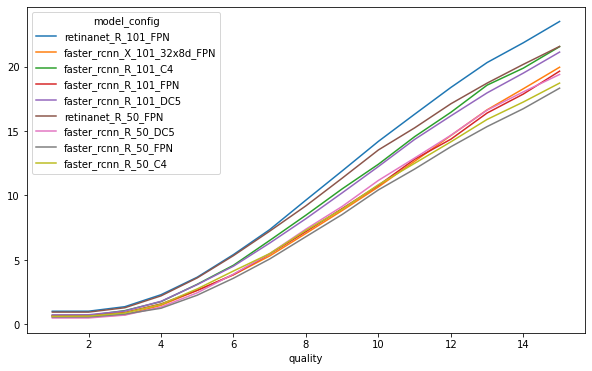

In [13]:
aps[:15].plot();

In [14]:
aps[aps.index % 5 == 0]

model_config,retinanet_R_101_FPN,faster_rcnn_X_101_32x8d_FPN,faster_rcnn_R_101_C4,faster_rcnn_R_101_FPN,...,retinanet_R_50_FPN,faster_rcnn_R_50_DC5,faster_rcnn_R_50_FPN,faster_rcnn_R_50_C4
quality,,,,,,,,,
5,3.665,2.647,3.115,2.642,...,3.612,2.456,2.270,2.757
10,14.199,10.665,12.424,10.787,...,13.533,11.169,10.436,10.837
15,23.496,19.947,21.542,19.641,...,21.560,19.387,18.323,18.716
20,29.017,26.585,27.218,25.736,...,26.836,24.823,23.733,24.106
25,31.965,30.419,30.354,29.192,...,29.843,28.424,27.390,27.594
...,...,...,...,...,...,...,...,...,...
80,38.874,38.602,37.311,37.253,...,36.972,35.791,35.665,34.630
85,39.289,38.946,37.704,37.735,...,37.328,36.098,35.868,35.264
90,39.640,39.378,38.081,38.255,...,37.724,36.540,36.379,35.746


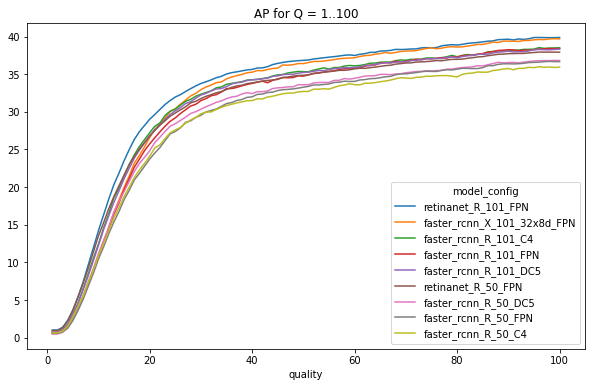

In [15]:
p = aps.plot(title='AP for Q = 1..100');
p.get_figure().savefig('models_AP_001_100.pdf')
p;

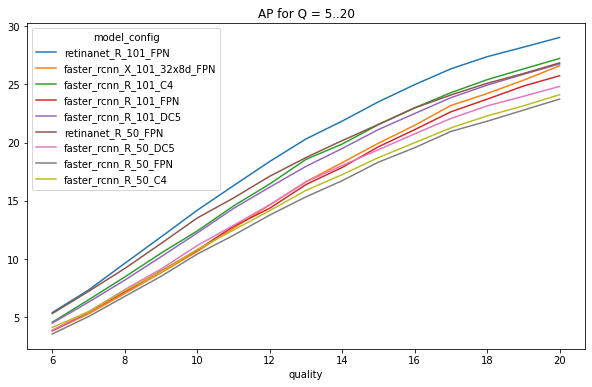

In [16]:
p = aps[5:20].plot(title='AP for Q = 5..20');
p.get_figure().savefig('models_AP_005_020.pdf')
p;

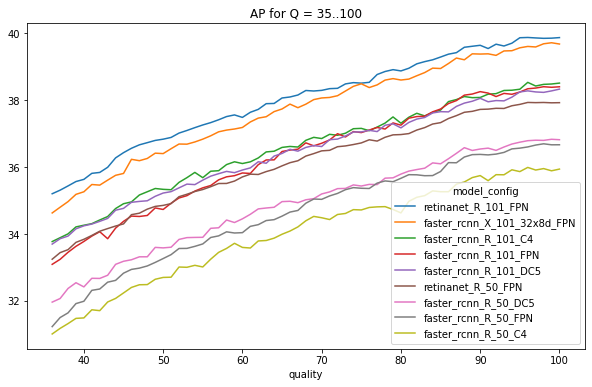

In [17]:
p = aps[35:].plot(title='AP for Q = 35..100');
p.get_figure().savefig('models_AP_035_100.pdf')
p;

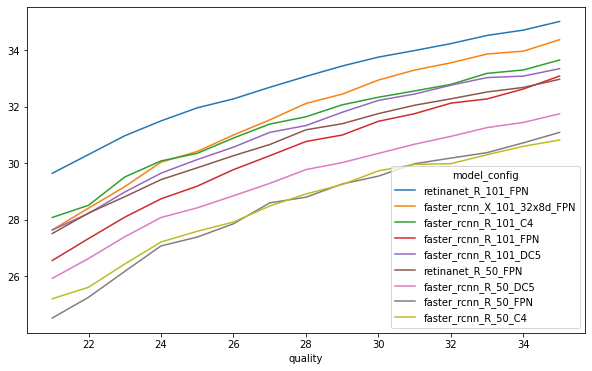

In [18]:
aps[20:35].plot();